In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as warn

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/WineQT.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
#Missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
# Check for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


In [9]:
#Statistical Description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


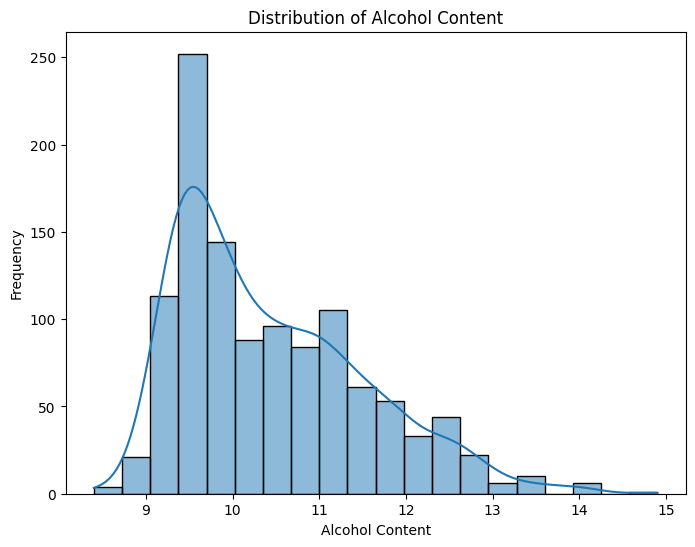

In [10]:
# alcohol content
plt.figure(figsize=(8, 6))
sns.histplot(data['alcohol'], bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

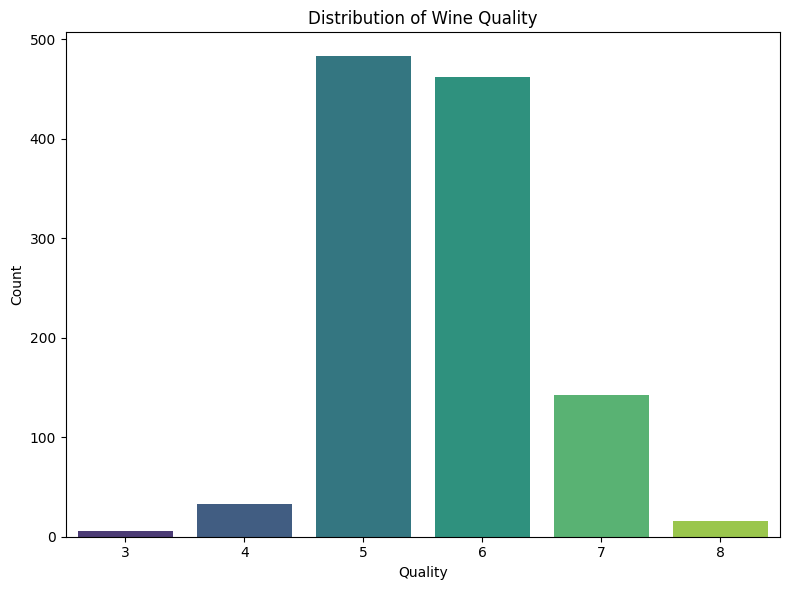

In [11]:
#quality distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

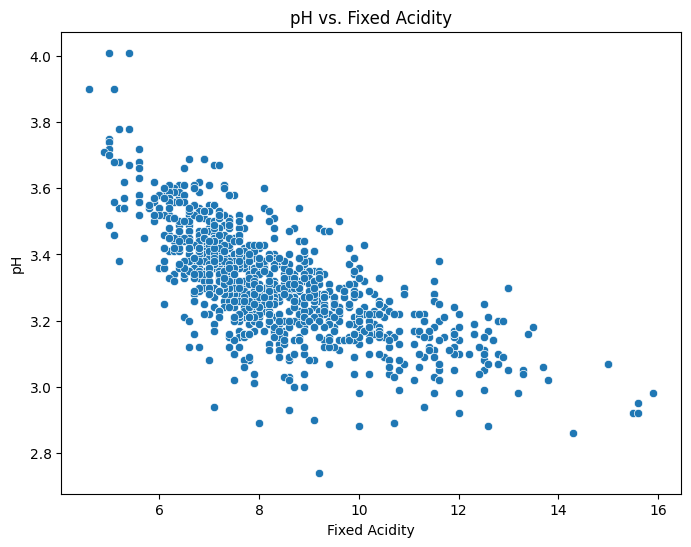

In [12]:
#pH vs. fixed acidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='pH', data=data)
plt.title('pH vs. Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

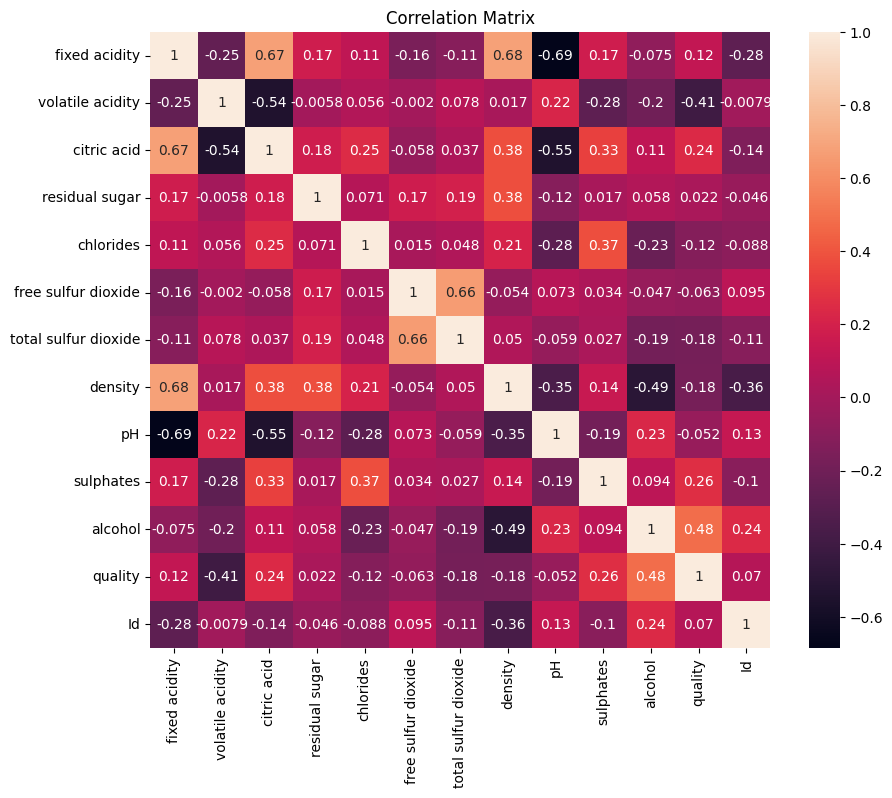

In [13]:
#correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

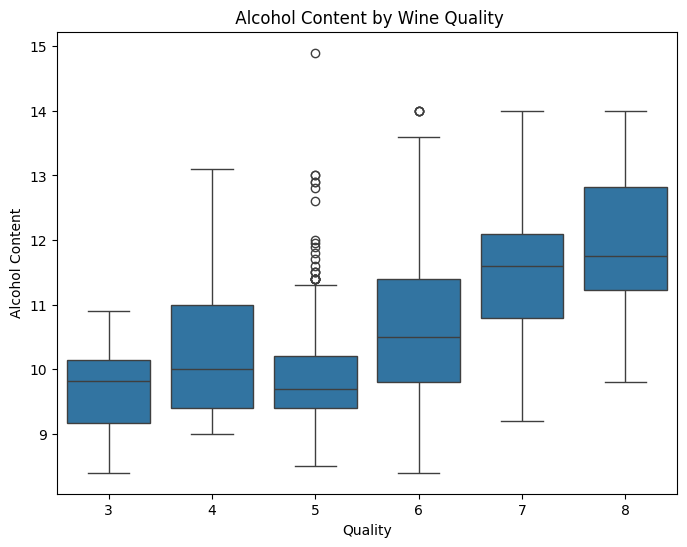

In [14]:
# quality vs. alcohol content
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title(' Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

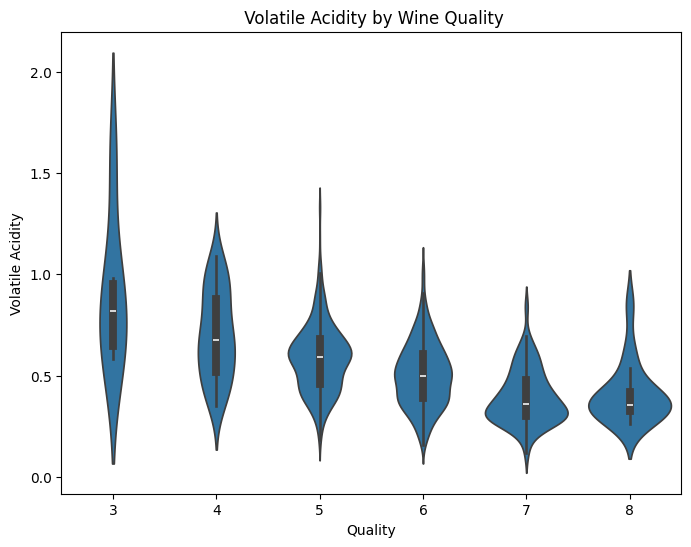

In [15]:
#quality vs. volatile acidity
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='volatile acidity', data=data)
plt.title(' Volatile Acidity by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

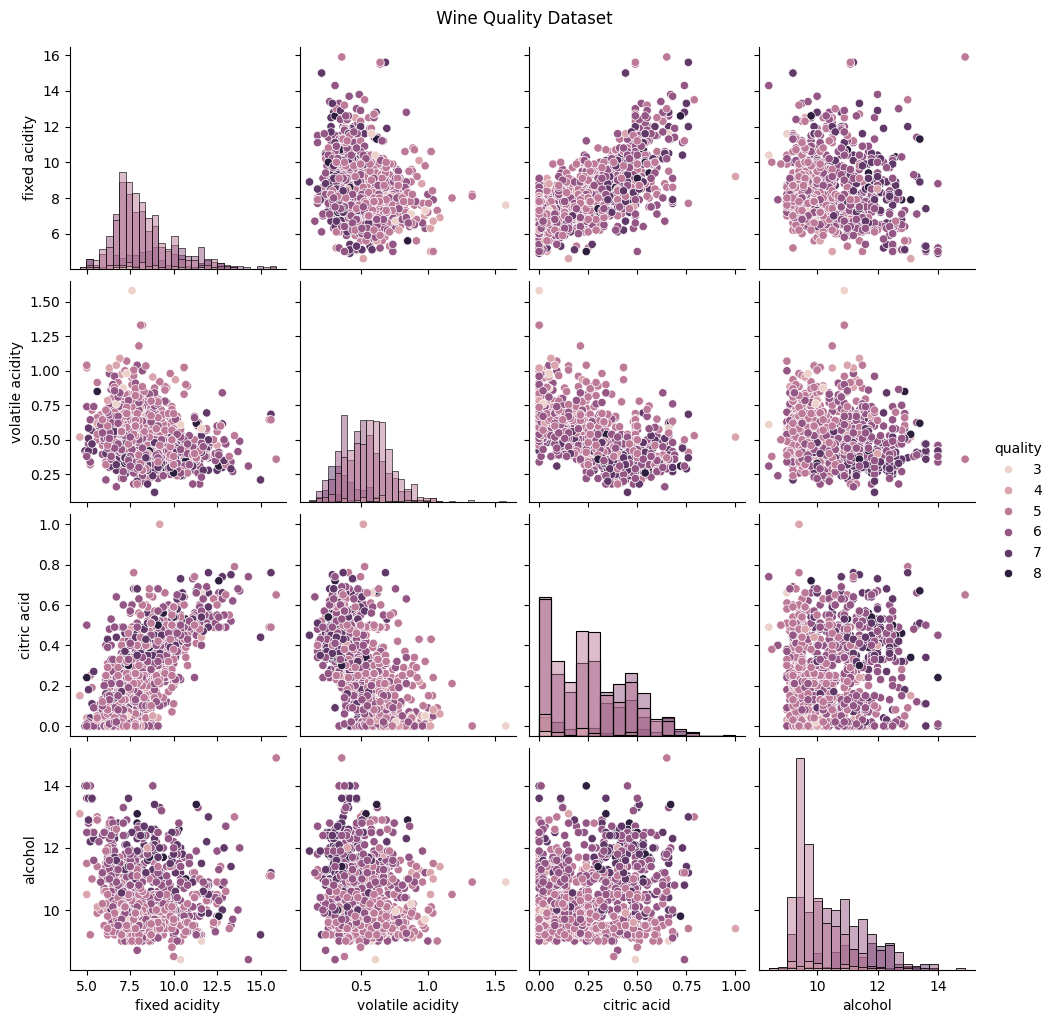

In [16]:
sns.pairplot(data, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol'], hue='quality', diag_kind='hist')
plt.suptitle(' Wine Quality Dataset', y=1.02)
plt.show()

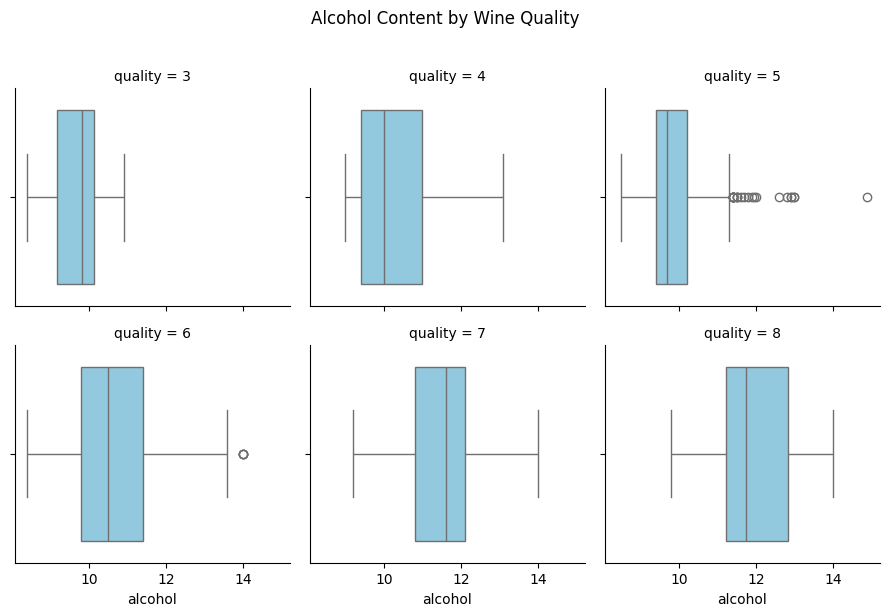

In [17]:
g = sns.FacetGrid(data, col='quality', col_wrap=3)
g.map(sns.boxplot, 'alcohol', color='skyblue')
plt.suptitle('Alcohol Content by Wine Quality', y=1.02)
plt.tight_layout()
plt.show()

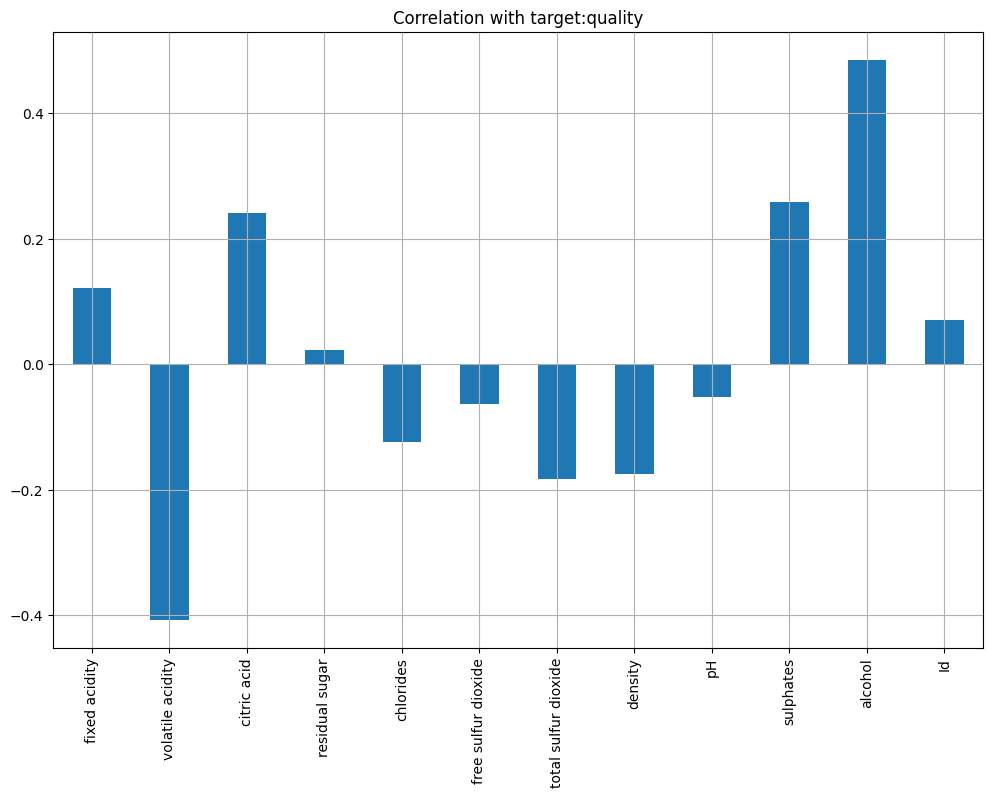

In [18]:
#show correlation between target"quality" and other variables
plt.figure(figsize=(8, 6))
X = data.drop('quality', axis=1)
y = data['quality']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target:quality");

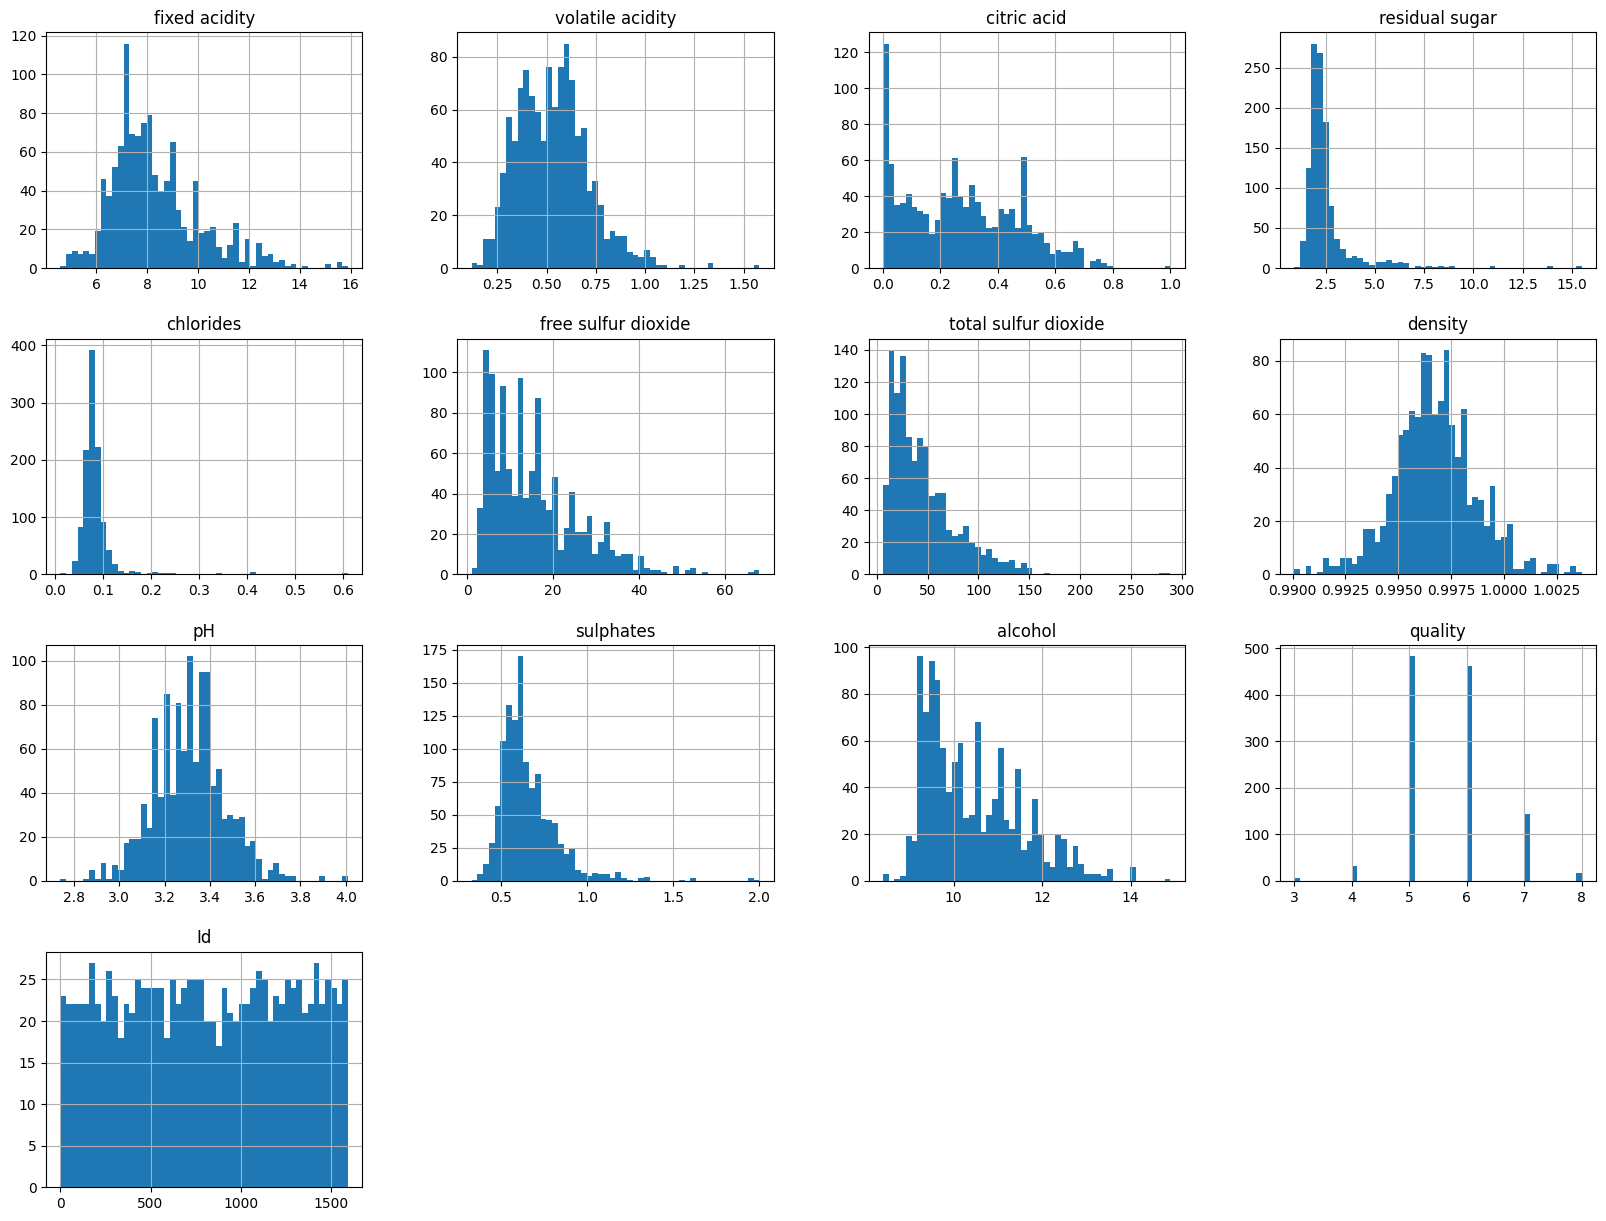

In [19]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

# Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Prepare the data
#Column ID can be dropped since its not necessary for our prediction.
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.38242835212918513
R-squared Score: 0.31276385395083994


# Logistic Regression

In [25]:
#Convert the target variable into a binary classification task
data['good_quality'] = (data['quality'] >= 7).astype(int)

In [26]:
#Prepare the data
X = data.drop(['quality', 'good_quality'], axis=1)
y = data['good_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Create and train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
#Make predictions
y_pred = model.predict(X_test)

In [29]:
#Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 89.08296943231441
